In [1]:
import numpy as np
import keras
import keras.layers as layers
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection._split import train_test_split

2022-03-29 23:40:29.666613: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-03-29 23:40:29.666638: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
#x = [1,    2,        3,           4, 5,                  6, 100]
#y = [0.99, 2.000001, 3.020000011, 4, 4.9999999999999923, 6, 10]

# Just checking out Y = mX + c (m = 1, c = 0 => Y = X)
x = range(0, 100, 1)
y = range(0, 100, 1)

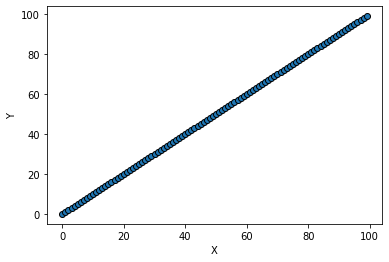

In [3]:
fig, ax = plt.subplots()
ax.scatter(x, y, edgecolors=(0, 0, 0))
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.show()

In [4]:
model = keras.Sequential([
      layers.Dense(1, use_bias=True, input_shape=(1,))
    ])

2022-03-29 23:40:36.469549: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-03-29 23:40:36.469581: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-03-29 23:40:36.469599: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (montyden): /proc/driver/nvidia/version does not exist
2022-03-29 23:40:36.469806: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
optimizer = tf.keras.optimizers.Adam(
    learning_rate=0.01, beta_1=0.9, beta_2=0.99, epsilon=1e-05, amsgrad=False,
    name='Adam')

In [6]:
model.compile(loss='mse', optimizer=optimizer, metrics=['mae','mse'])

In [7]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33)

In [8]:
# A mechanism that stops training if the validation loss is not improving for more than n_idle_epochs.
n_idle_epochs = 100
earlyStopping = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=n_idle_epochs, min_delta=0.01)
# Creating a custom callback to print the log after a certain number of epochs
class NEPOCHLogger(tf.keras.callbacks.Callback):
    def __init__(self,per_epoch=100):
        '''
        display: Number of batches to wait before outputting loss
        '''
        self.seen = 0
        self.per_epoch = per_epoch
    
    def on_epoch_end(self, epoch, logs=None):
      if epoch % self.per_epoch == 0:
        print('Epoch {}, loss {:.2f}, mae {:.2f}, mse {:.2f}'\
              .format(epoch, logs['loss'], logs['mae'], logs['mse']))

log_display = NEPOCHLogger(per_epoch=10)

In [9]:
n_epochs = 2000
history = model.fit(
  X_train, y_train, batch_size=32,
  epochs=n_epochs, verbose=0, callbacks=[earlyStopping, log_display])

Epoch 0, loss 433.58, mae 18.01, mse 433.58
Epoch 10, loss 36.18, mae 5.14, mse 36.18
Epoch 20, loss 0.35, mae 0.58, mse 0.35
Epoch 30, loss 0.05, mae 0.20, mse 0.05
Epoch 40, loss 0.04, mae 0.17, mse 0.04
Epoch 50, loss 0.03, mae 0.15, mse 0.03
Epoch 60, loss 0.03, mae 0.15, mse 0.03
Epoch 70, loss 0.03, mae 0.14, mse 0.03
Epoch 80, loss 0.03, mae 0.14, mse 0.03
Epoch 90, loss 0.03, mae 0.13, mse 0.03
Epoch 100, loss 0.02, mae 0.13, mse 0.02
Epoch 110, loss 0.02, mae 0.12, mse 0.02
Epoch 120, loss 0.02, mae 0.11, mse 0.02
Epoch 130, loss 0.02, mae 0.11, mse 0.02
Epoch 140, loss 0.01, mae 0.10, mse 0.01
Epoch 150, loss 0.01, mae 0.09, mse 0.01
Epoch 160, loss 0.01, mae 0.08, mse 0.01
Epoch 170, loss 0.01, mae 0.07, mse 0.01
Epoch 180, loss 0.01, mae 0.06, mse 0.01
Epoch 190, loss 0.00, mae 0.05, mse 0.00
Epoch 200, loss 0.00, mae 0.04, mse 0.00
Epoch 210, loss 0.00, mae 0.03, mse 0.00
Epoch 220, loss 0.00, mae 0.03, mse 0.00
Epoch 230, loss 0.00, mae 0.02, mse 0.00
Epoch 240, loss 0.00

In [10]:
predictions = model.predict(X_test).flatten()

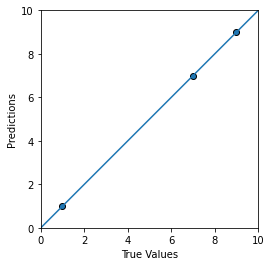

In [11]:
a = plt.axes(aspect='equal')
plt.scatter(predictions, y_test, edgecolors=(0, 0, 0))
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 10]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [12]:
model.predict([10,20,30,200])

array([[  9.996741],
       [ 19.997276],
       [ 29.997812],
       [200.00691 ]], dtype=float32)

In [22]:
#model.save("linear.h5") # for HDF5 format

# For converting to ONNX
tf.saved_model.save(model, "models/saved_models/linear_model")

print("===============================================================================================================================================")
print("\n\n>>> IMPORTANT: CONVERT TO ONNX MODEL FORMAT\n\n$ python3 -m tf2onnx.convert --saved-model 'models/saved_models/linear_model' --output 'models/onnx_models/linear.onnx'\n\n")
print("===============================================================================================================================================")

INFO:tensorflow:Assets written to: models/saved_models/linear_model/assets


>>> IMPORTANT: CONVERT TO ONNX MODEL FORMAT

$ python3 -m tf2onnx.convert --saved-model 'models/saved_models/linear_model' --output 'models/onnx_models/linear.onnx'




In [23]:
import onnxruntime
session = onnxruntime.InferenceSession("models/onnx_models/linear.onnx", providers=['CPUExecutionProvider'])


xrange = np.arange(1000, 1025, 1)
x_live = np.array([xrange[i:i+1] for i in range(0,len(xrange),1)]).astype(np.float32)
print(x_live)

ortvalue = onnxruntime.OrtValue.ortvalue_from_numpy(x_live)
ortvalue.device_name()  # 'cpu'
ortvalue.shape()        # shape of the numpy array X
ortvalue.data_type()    # 'tensor(float)'
ortvalue.is_tensor()    # 'True'

input_name = session.get_inputs()[0].name
print(input_name)

output_name = session.get_outputs()[0].name
print(output_name)

np.array_equal(ortvalue.numpy(), x_live)  # 'True'



[[1000.]
 [1001.]
 [1002.]
 [1003.]
 [1004.]
 [1005.]
 [1006.]
 [1007.]
 [1008.]
 [1009.]
 [1010.]
 [1011.]
 [1012.]
 [1013.]
 [1014.]
 [1015.]
 [1016.]
 [1017.]
 [1018.]
 [1019.]
 [1020.]
 [1021.]
 [1022.]
 [1023.]
 [1024.]]
dense_input
dense


True

In [24]:
results = session.run(None, {input_name: ortvalue})
print(results)

[array([[1000.04974],
       [1001.0498 ],
       [1002.04987],
       [1003.0499 ],
       [1004.0499 ],
       [1005.05   ],
       [1006.05005],
       [1007.0501 ],
       [1008.0502 ],
       [1009.05023],
       [1010.0503 ],
       [1011.05035],
       [1012.05035],
       [1013.0504 ],
       [1014.0505 ],
       [1015.05054],
       [1016.0506 ],
       [1017.05066],
       [1018.0507 ],
       [1019.0508 ],
       [1020.0508 ],
       [1021.05084],
       [1022.0509 ],
       [1023.05096],
       [1024.051  ]], dtype=float32)]
